In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
plt.style.use('seaborn-colorblind') # Set plot style

### Explore the data with built-in pandas methods

In [5]:
planet_data = pd.read_csv('../data/distinct_planets.csv')  #Load data from csv
planet_data.describe()

,disc_year,sy_snum,sy_pnum,glat,glon,pl_orbper,pl_rade,sy_dist,pl_eqt,pl_orbeccen
count,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4.258000e+03,4387.000000,4395.000000,3277.000000,3918.000000
mean,2014.653488,1.112702,1.785276,6.609721,127.960978,3.925921e+03,5.695589,655.926678,919.583975,0.068775
std,3.877692,0.356147,1.171643,28.121658,92.566966,1.664259e+05,5.399877,910.792008,463.382033,0.143718
min,1989.000000,1.000000,1.000000,-88.324780,0.039250,9.070629e-02,0.296000,1.301190,50.000000,0.000000
25%,2014.000000,1.000000,1.000000,2.259890,73.900760,4.463672e+00,1.750000,134.354000,570.000000,0.000000
50%,2016.000000,1.000000,1.000000,12.115680,79.007860,1.181235e+01,2.730000,448.637000,827.000000,0.000000
75%,2016.000000,1.000000,2.000000,17.168900,187.392500,4.180833e+01,11.960000,863.864000,1164.000000,0.070000
max,2021.000000,4.000000,8.000000,86.470460,359.996270,8.040000e+06,77.342000,8500.000000,4050.000000,0.950000


In [6]:
planet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pl_name          4401 non-null   object 
 1   discoverymethod  4401 non-null   object 
 2   disc_year        4401 non-null   int64  
 3   disc_facility    4401 non-null   object 
 4   sy_snum          4401 non-null   int64  
 5   sy_pnum          4401 non-null   int64  
 6   glat             4401 non-null   float64
 7   glon             4401 non-null   float64
 8   pl_orbper        4258 non-null   float64
 9   pl_rade          4387 non-null   float64
 10  sy_dist          4395 non-null   float64
 11  pl_eqt           3277 non-null   float64
 12  pl_orbeccen      3918 non-null   float64
dtypes: float64(7), int64(3), object(3)
memory usage: 447.1+ KB


NOTE:  Nulls in orbital period, planet radius, and system distance (sy_dist), planet temperature (pl_eqt), orbit eccentricity (pl_orbeccen) columns

In [7]:
disc_methods = planet_data['discoverymethod'].value_counts() # Find number of confirmed exoplanets per detection method
disc_methods

Transit                          3336
Radial Velocity                   850
Microlensing                      108
Imaging                            53
Transit Timing Variations          21
Eclipse Timing Variations          16
Pulsar Timing                       7
Orbital Brightness Modulation       6
Pulsation Timing Variations         2
Astrometry                          1
Disk Kinematics                     1
Name: discoverymethod, dtype: int64

In [8]:
def feature_counts(ds, sort=False):
    if sort == True:
        return ds.value_counts().sort_index()
    else:
        return ds.value_counts()

def feature_bar_plot(ax, data, plot_type, title, xlabel, ylabel, sort=False, bar_color ='turquoise'):
    feature_obj = feature_counts(data, sort)
    if plot_type == 'h':
        bars = ax.barh(feature_obj.index, feature_obj.values, color = bar_color)
        
        # Add labels for each bar
        for bar in bars:
          width = bar.get_width()
          label_y_pos = bar.get_y() + bar.get_height() / 2
          ax.text(width, label_y_pos, s=f'{width}', va='center')
    else:
        bars = ax.bar(feature_obj.index, feature_obj.values, color = bar_color)
        
        # Add labels for each bar
        for bar in bars:
          height = bar.get_height()
          label_x_pos = bar.get_x() + bar.get_width() / 2
          ax.text(label_x_pos, height, s=f'{height}', ha='center')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

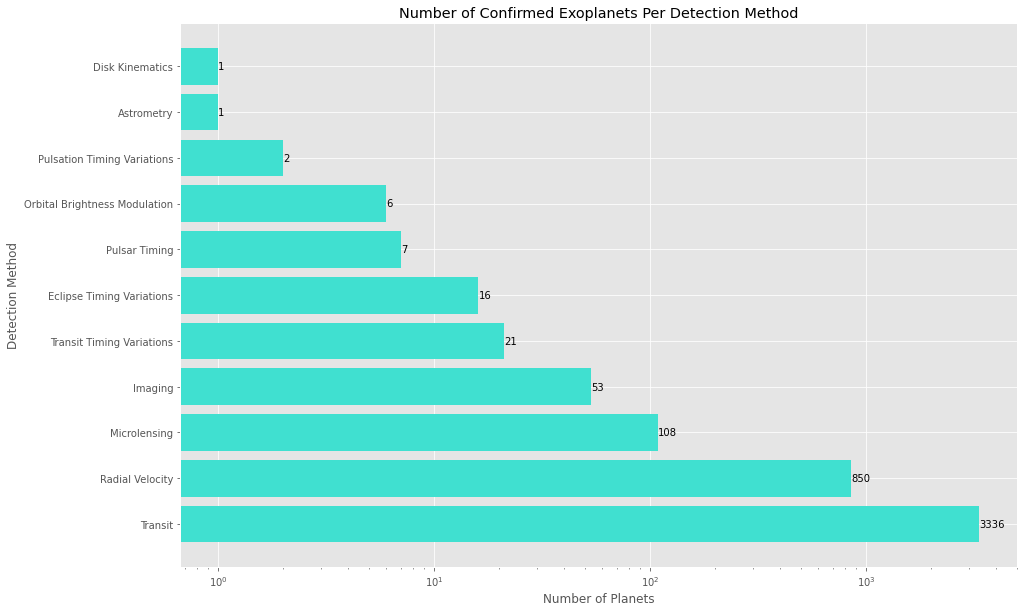

In [9]:
# Create a bar plot of exoplanet detections by discovery method
title = 'Number of Confirmed Exoplanets Per Detection Method'
xlabel = 'Number of Planets'
ylabel = 'Detection Method'

fig, ax = plt.subplots(figsize = (15,10))
feature_bar_plot(ax, planet_data['discoverymethod'], 'h', title, xlabel, ylabel)
ax.set_xscale('log')


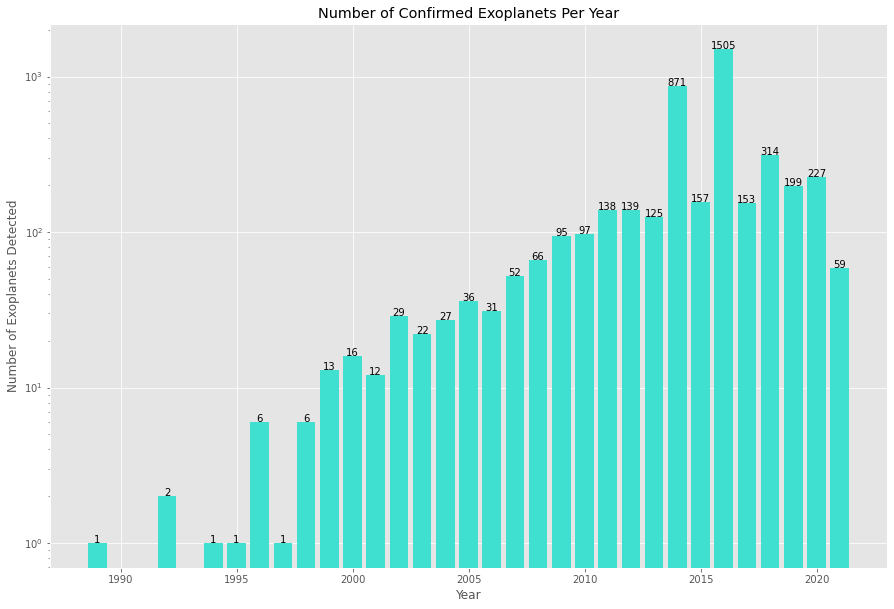

In [10]:
fig, ax_yrs = plt.subplots(figsize = (15,10))

title = 'Number of Confirmed Exoplanets Per Year'
xlabel = 'Year'
ylabel = 'Number of Exoplanets Detected'

feature_bar_plot(ax_yrs, planet_data['disc_year'], 'v', title, xlabel, ylabel, sort=True)
ax_yrs.set_yscale('log')  # Set y axis to log scale

Text(0, 0.5, 'Number of Planets')

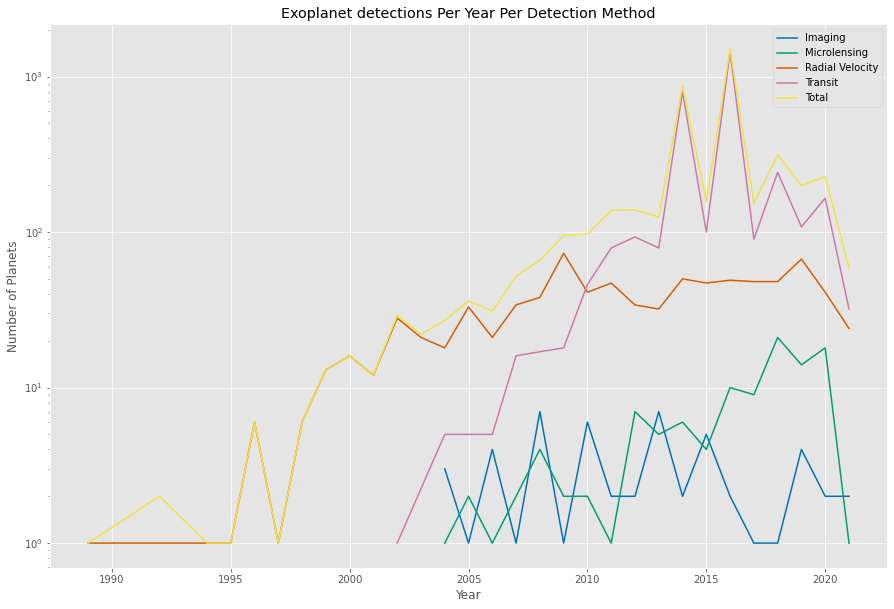

In [29]:
# Line plot per detection method
top_methods = disc_methods[disc_methods > 50].index

# Throw out methods with less than 50 detections to de-clutter plot
reduced_planet_data = planet_data[planet_data['discoverymethod'].isin(top_methods)]

# Plot number of detects over time for top methods
fig2, ax2 = plt.subplots(figsize=(15,10))
for name, method in reduced_planet_data.groupby('discoverymethod')['disc_year']:
    x = method.value_counts().sort_index().index
    y = method.value_counts().sort_index().values
    ax2.plot(x, y, label = f"{name}")
# Plot total number of planets per year for reference
num_planets_total = planet_data['disc_year'].value_counts().sort_index()
ax2.plot(num_planets_total.index, num_planets_total.values, label = 'Total')
# Add plot labels
ax2.set_yscale('log')
ax2.legend(loc='best')
ax2.set_title('Exoplanet detections Per Year Per Detection Method')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Planets')

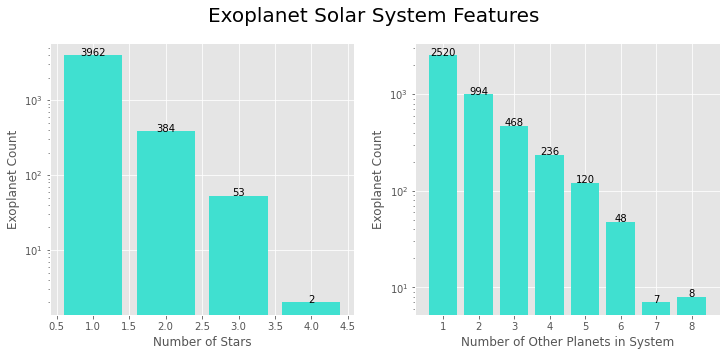

In [12]:
# Create bar plots of exoplanet host solar system features

ylabel = 'Exoplanet Count' # define common y label for both features

fig, axs = plt.subplots(1,2,figsize = (12,5))
fig.suptitle('Exoplanet Solar System Features', fontsize = 20)
feature_bar_plot(axs[0], planet_data['sy_snum'], 'v', ' ', "Number of Stars", ylabel, sort=True)
axs[0].set_yscale('log')

feature_bar_plot(axs[1], planet_data['sy_pnum'], 'v', ' ', 'Number of Other Planets in System', ylabel, sort=True)
axs[1].set_yscale('log')

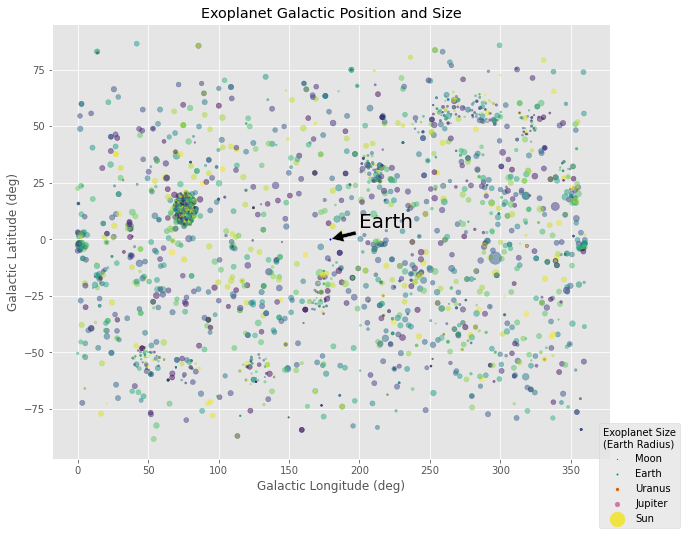

In [32]:
# Plot lat, long, size scaled to planet radius
import random
import matplotlib.cm as cm

def galactic_plot(data, fig, ax, title, plot_earth=True):
    earth_coords = (179,0)
    color = np.random.rand(len(data)) # Generate random numbers to identify different colors for plot markers
    ax.scatter(data['glon'], data['glat'], s= data['pl_rade']*2, c=color, cmap=cm.viridis, alpha = 0.5)
    # Plot Earth and annotate if plot flag set to True
    if plot_earth == True:
        ax.scatter(earth_coords[0], earth_coords[1], s=2,color = 'blue') # Plot Earth
        ax.annotate('Earth', xy=earth_coords, xytext= (200,5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=20)
    
    ax.set_title(title)
    ax.set_ylabel('Galactic Latitude (deg)')
    ax.set_xlabel('Galactic Longitude (deg)')
    # Create legend
    sz = np.array([0.27, 1, 4.01, 11.2, 109.2])
    handles = [ax.scatter([], [], s=sz[i]*2) for i in range(len(sz))]
    labels = ['Moon', 'Earth', 'Uranus', 'Jupiter', 'Sun']
    fig.legend(handles=handles, labels=labels, scatterpoints=1, title='Exoplanet Size\n(Earth Radius)', loc = 'lower right')

fig,ax4 = plt.subplots(figsize=(10,8))
galactic_plot(planet_data, fig, ax4, 'Exoplanet Galactic Position and Size')


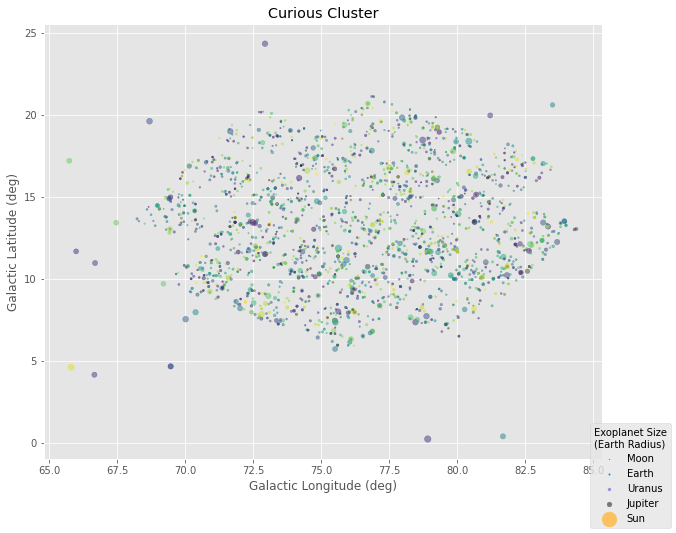

In [14]:
curious_cluster = planet_data[(planet_data['glat'] > 0) & (planet_data['glat'] < 25) & (planet_data['glon'] > 65) & (planet_data['glon'] < 85)]
fig, ax_10 = plt.subplots(figsize=(10,8))
galactic_plot(curious_cluster, fig, ax_10, 'Curious Cluster',plot_earth = False)

In [15]:
curious_cluster

,pl_name,discoverymethod,disc_year,disc_facility,sy_snum,sy_pnum,glat,glon,pl_orbper,pl_rade,sy_dist,pl_eqt,pl_orbeccen
2,Kepler-276 c,Transit,2013,Kepler,1,3,9.13322,72.30607,31.884000,2.900,1144.860,563.0,0.00
3,Kepler-829 b,Transit,2016,Kepler,1,1,18.29325,71.95093,6.883376,2.110,1073.760,857.0,0.00
5,Kepler-477 b,Transit,2016,Kepler,2,1,14.33019,73.50616,11.119907,2.070,367.000,649.0,0.00
20,Kepler-1390 b,Transit,2016,Kepler,1,1,10.29931,82.29819,6.480217,1.180,723.431,934.0,0.00
21,Kepler-393 c,Transit,2014,Kepler,1,2,13.57678,77.06756,14.613612,1.330,881.404,901.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4382,Kepler-10 b,Transit,2011,Kepler,1,2,18.81626,80.48988,0.837491,1.481,185.506,2130.0,0.06
4383,Kepler-1257 b,Transit,2016,Kepler,1,1,10.58208,79.09698,2.668314,1.520,1105.950,1252.0,0.00
4384,Kepler-1100 b,Transit,2016,Kepler,1,1,12.53992,76.31734,6.422001,1.750,693.618,1000.0,0.00
4385,Kepler-152 b,Transit,2014,Kepler,1,2,15.00096,72.79154,18.207973,2.790,441.090,551.0,0.00


<AxesSubplot:title={'center':'Total Data Facility'}, xlabel='Number per Facility', ylabel='Facility'>

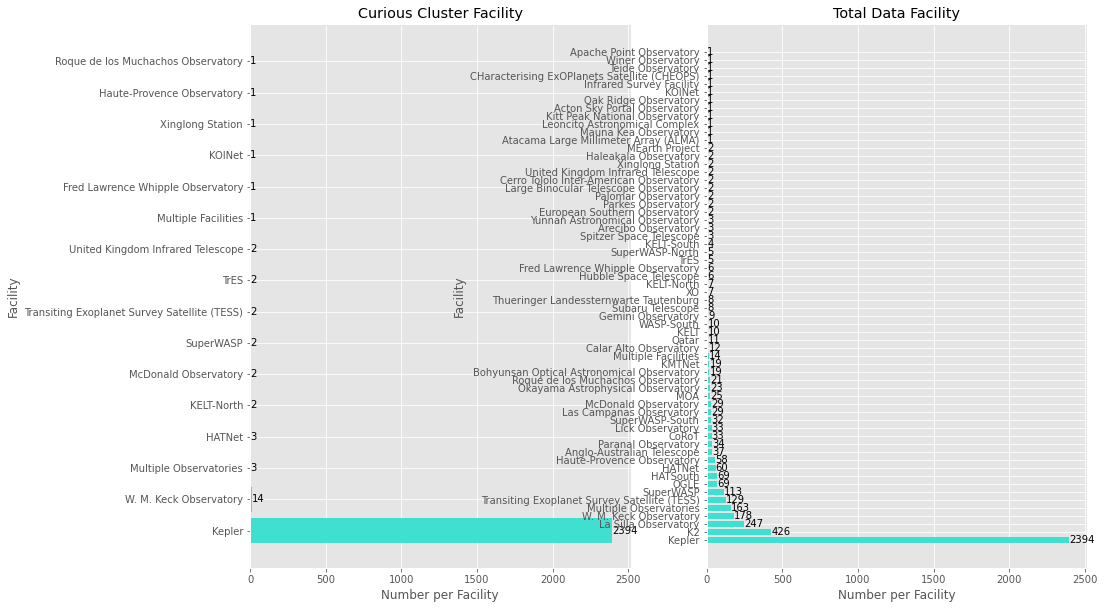

In [16]:
fig, ax9 = plt.subplots(1,2,figsize = (15,10))
feature_bar_plot(ax9[0], curious_cluster['disc_facility'], 'h', 'Curious Cluster Facility', 'Number per Facility', 'Facility')
feature_bar_plot(ax9[1], planet_data['disc_facility'], 'h', 'Total Data Facility', 'Number per Facility', 'Facility')

<AxesSubplot:title={'center':'Confirmed Planets over Time for K2'}, xlabel='Year', ylabel='Number of Planets'>

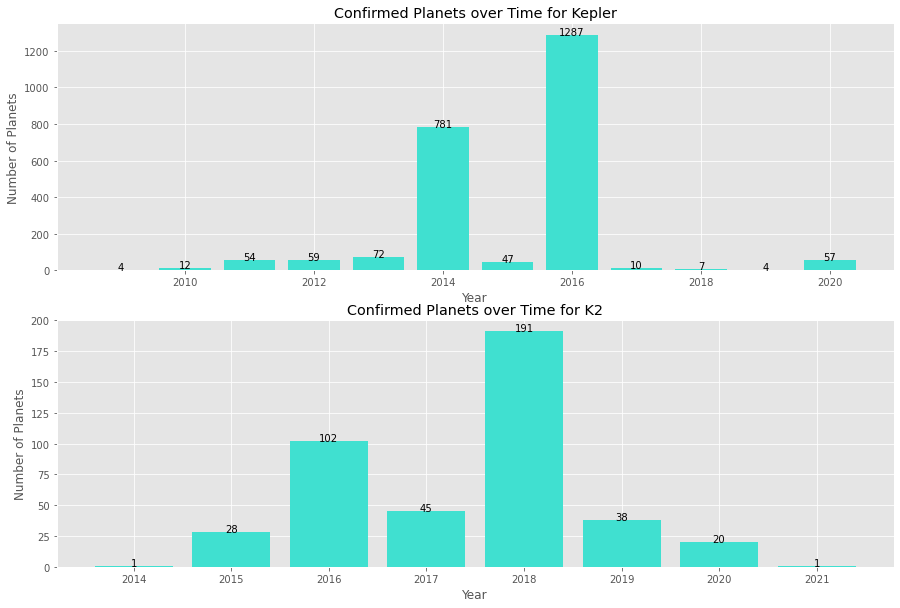

In [17]:
# Why are Kepler detections so much higher than K2 (more recent telescope)

fig, ax10 = plt.subplots(2,1, figsize = (15,10))
feature_bar_plot(ax10[0], planet_data[planet_data['disc_facility'] == 'Kepler']['disc_year'], 'v', 'Confirmed Planets over Time for Kepler', 'Year', 'Number of Planets')
feature_bar_plot(ax10[1], planet_data[planet_data['disc_facility'] == 'K2']['disc_year'], 'v', 'Confirmed Planets over Time for K2', 'Year', 'Number of Planets')

In [18]:
# Separate data by decades
data_decade_1 = planet_data[planet_data['disc_year'] <=2000]
data_decade_2 = planet_data[(planet_data['disc_year'] > 2000) & (planet_data['disc_year'] <= 2010)]
data_decade_3 = planet_data[(planet_data['disc_year'] > 2010) & (planet_data['disc_year'] <= 2021)]

Text(0.5, 0.98, 'Galactic Position of Detected Exoplanets by Decade')

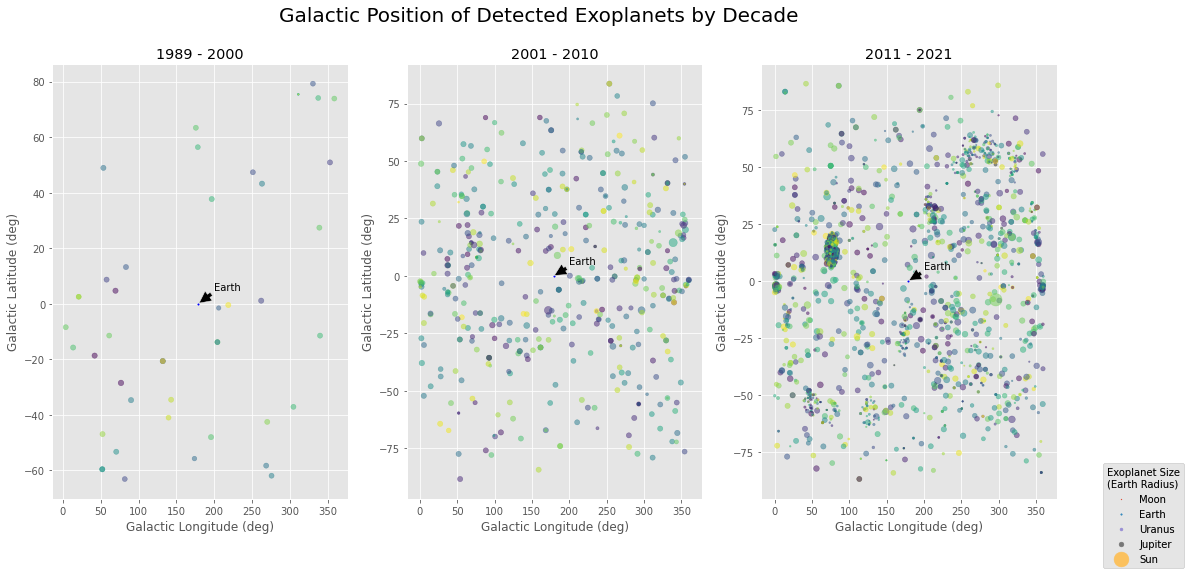

In [27]:
# Facet plots/color code over decade
 
fig,ax6 = plt.subplots(1, 3, figsize=(18,8))
# 1st subplot
galactic_plot(data_decade_1, fig, ax6[0], '1989 - 2000')
# 2nd subplot
galactic_plot(data_decade_2, fig, ax6[1], '2001 - 2010')
# 3rd subplot
galactic_plot(data_decade_3, fig, ax6[2], '2011 - 2021')
fig.suptitle('Galactic Position of Detected Exoplanets by Decade', fontsize = 20)


Text(0.5, 0.98, 'Exoplanet Radius Statistics by Decade')

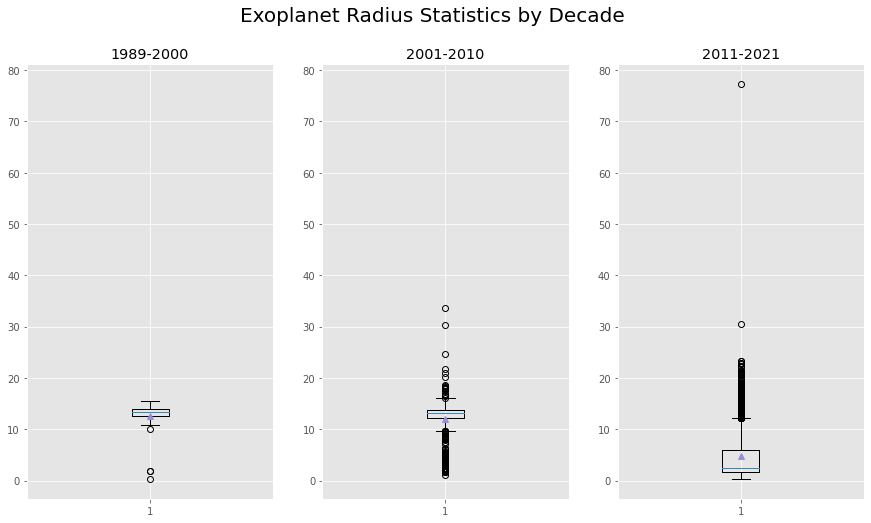

In [20]:
# Box plots by decade
def box_facet(axs, data_list,col_name, titles):
    y_maxs = []
    y_mins = []
    for i, ax in enumerate(axs):
        ax.boxplot(data_list[i][col_name].dropna(), showmeans = True)
        ax.set_title(titles[i])
        y_min, y_max = ax.get_ylim()
        y_maxs.append(y_max)
        y_mins.append(y_min)
    # Ensure limits are the same for all axes
    for ax in axs:
        ax.set_ylim(min(y_mins),max(y_maxs))
        
        
fig, ax_boxes = plt.subplots(1,3, figsize = (15,8))
box_facet(ax_boxes, [data_decade_1, data_decade_2, data_decade_3], 'pl_rade', ['1989-2000', '2001-2010', '2011-2021'])
fig.suptitle('Exoplanet Radius Statistics by Decade', fontsize = 20)


Text(0.5, 1.0, 'Exoplanet Galactic Position and Size (by Detection Method)')

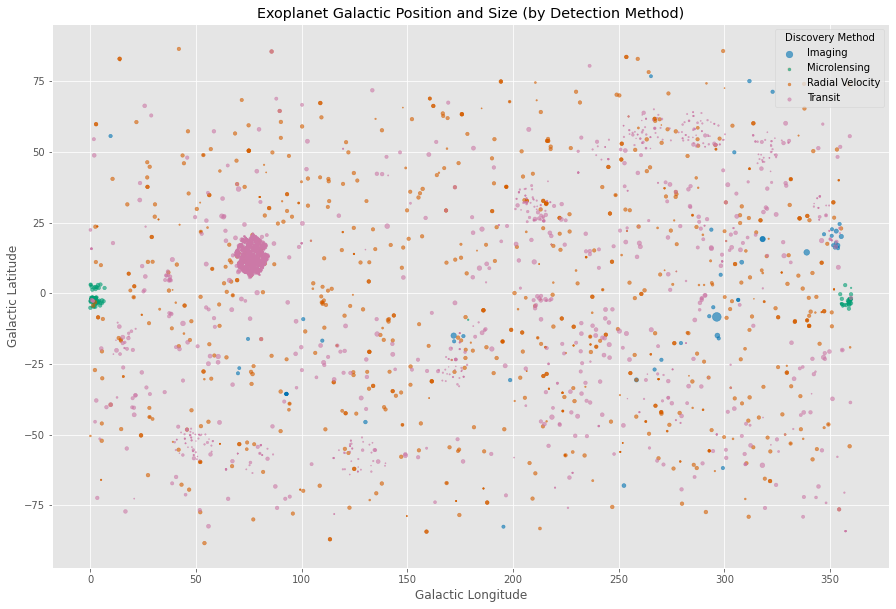

In [30]:
# Plot lat, long, size scaled to planet radius

# Color code by discovery method
fig,ax5 = plt.subplots(figsize=(15,10))

for name, method in reduced_planet_data.groupby('discoverymethod'):
    ax5.scatter(x = 'glon', y = 'glat', s= 'pl_rade', label = f"{name}", data = method, alpha = 0.6)
ax5.legend(title='Discovery Method', loc='best')

ax5.set_xlabel('Galactic Longitude')
ax5.set_ylabel('Galactic Latitude')
ax5.set_title('Exoplanet Galactic Position and Size (by Detection Method)')

Text(0.5, 1.0, 'Exoplanet Galactic Position and Size (by Detection Facility)')

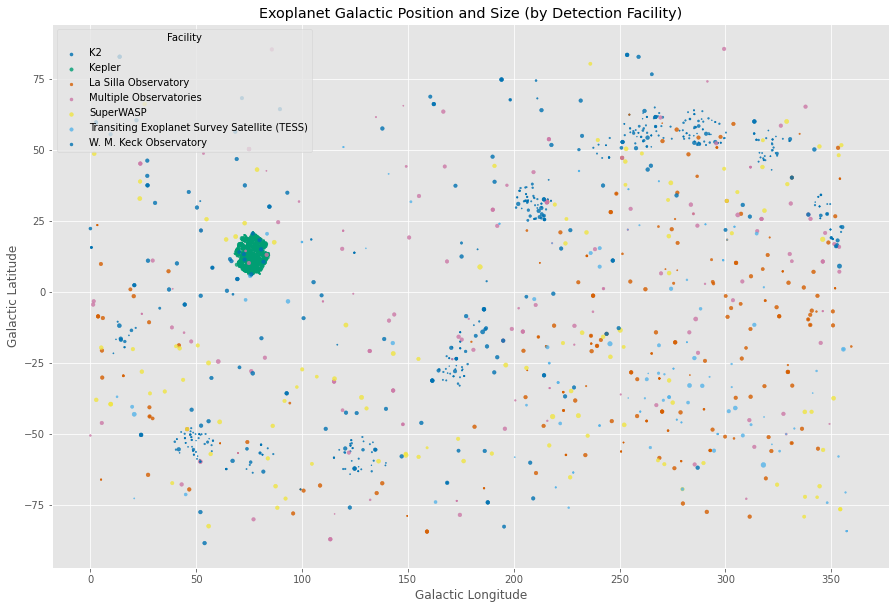

In [33]:
# Separate top discovery facilities for plotting
facilities = planet_data['disc_facility'].value_counts()
top_facilities = facilities[facilities > 100].index
# Throw out methods with less than 50 detections to de-clutter plot
facilities_planet_data = planet_data[planet_data['disc_facility'].isin(top_facilities)]
facilities_planet_data['pl_rade'].apply(lambda x: 5*x)
# Color code by discovery method
fig,ax11 = plt.subplots(figsize=(15,10))

for name, facility in facilities_planet_data.groupby('disc_facility'):
    ax11.scatter(x = 'glon', y = 'glat', s= 'pl_rade', label = f"{name}", data = facility, alpha = 0.8)
ax11.legend(title='Facility', loc='best')

ax11.set_xlabel('Galactic Longitude')
ax11.set_ylabel('Galactic Latitude')
ax11.set_title('Exoplanet Galactic Position and Size (by Detection Facility)')

Text(0.5, 1.0, 'Galactic Distance')

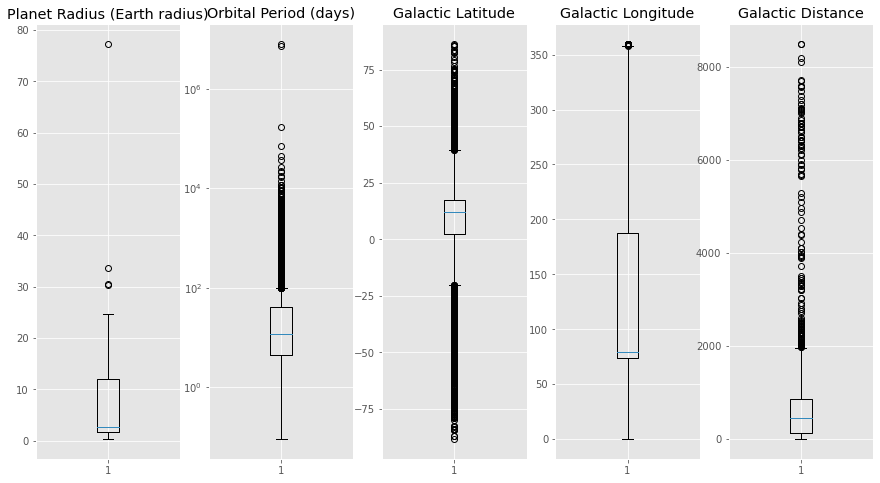

In [361]:
# Box plots of planet characteristics
fig, axs2 = plt.subplots(1,5, figsize = (15,8))
axs2[0].boxplot(planet_data['pl_rade'].dropna())
axs2[0].set_title('Planet Radius (Earth radius)')

axs2[1].boxplot(planet_data['pl_orbper'].dropna())
axs2[1].set_title('Orbital Period (days)')
axs2[1].set_yscale('log')

axs2[2].boxplot(planet_data['glat'].dropna())
axs2[2].set_title('Galactic Latitude')

axs2[3].boxplot(planet_data['glon'].dropna())
axs2[3].set_title('Galactic Longitude')

axs2[4].boxplot(planet_data['sy_dist'].dropna())
axs2[4].set_title('Galactic Distance')

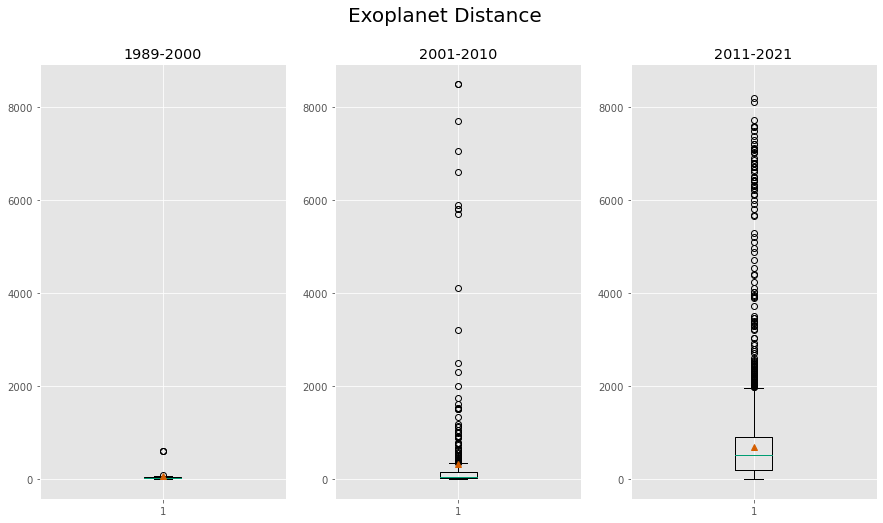

In [35]:
# Box plots of galactic distance by decade
fig, ax_boxes = plt.subplots(1,3, figsize = (15,8))

box_facet(ax_boxes, [data_decade_1, data_decade_2, data_decade_3], 'sy_dist', ['1989-2000', '2001-2010', '2011-2021'])
fig.suptitle('Exoplanet Distance', fontsize = 20);